# EDA:

The first step in any Data Science project is to understand the data that is given to us. There are few standard questions you can ask in order to get the understanding:
* What is the size of the dataset?
* What is the time range of the data?
* What is the meaning of each column and its values in the dataset? (can get this information from Data Dictionary)
* What is the distribution and unique values for each column? (univariate analysis)
* What is the distribution and unique values for some combinations of columns? (bivariate & multivariate analysis)

If you try to answer these questions with the help of data, then you would get a good understanding of the data which can be leveraged in **Feature Engineering** & **Model Building** part of the project.

# Contents:

I. [Loading the Data:](#Loading-the-Data:)

II. [Univariate Analysis:](#Univariate-Analysis:)


*  [Time range of Data:](#Time-range-of-Data:)

* [Distribution of Category:](#Distribution-of-Category:)

* [Distribution of SubCategory:](#Distribution-of-SubCategory:)

* [Distribution of Action:](#Distribution-of-Action:)

* [Distribution of Quantity:](#Distribution-of-Quantity:)

* [Distribution of Rate:](#Distribution-of-Rate:)

* [Distribution of Total Price:](#Distribution-of-Total-Price:)

    
    
III. [Multivariate Analysis:](#Multivariate-Analysis:)

* [How many unique users in the data and how many of them purchased atleast once? Also, what is the average number of purchase per customer?](#How-many-unique-users-in-the-data-and-how-many-of-them-purchased-atleast-once?-Also,-what-is-the-average-number-of-purchase-per-customer?)

* [Which is the most purchased Category/Sub-category?](#Which-is-the-most-purchased-Category/Sub-category?)

* [Do people add the products to cart before they purchase or buy directly?](#Do-people-add-the-products-to-cart-before-they-purchase-or-buy-directly?)

* [What is the average time taken by a user to buy a product?](#What-is-the-average-time-taken-by-a-user-to-buy-a-product?)

* [What is the average time between repeat purchase?](#What-is-the-average-time-between-repeat-purchase?)

* [What is the trend of unique users across time period?](#What-is-the-trend-of-unique-users-across-time-period?)

* [What is the trend of purchase across the time period?](#What-is-the-trend-of-purchase-across-the-time-period?)

## Loading the Data:

([Contents:](#Contents:))

In [1]:
# Importing the necessary Libraries
import pandas as pd
import numpy as np
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings 
warnings.filterwarnings('ignore')

In [2]:
# Reading the data and changing the data type of the column "DateTime" from string to datetime format
data = pd.read_excel('../input/final_customer_data.xlsx')
data['DateTime'] = pd.to_datetime(data['DateTime'])
print(data.shape)
data.head()

(2090, 9)


,User_id,Session_id,DateTime,Category,SubCategory,Action,Quantity,Rate,Total Price
0,52243841613,d76fde-8bb3-4e00-8c23,2019-01-10 10:20:00,Electronic Appliances,Speakers,first_app_open,NaN,NaN,NaN
1,52243841613,33dfbd-b87a-4708-9857,2019-01-10 10:22:00,Electronic Appliances,Speakers,search,NaN,NaN,NaN
2,57314161118,6511c2-e2e3-422b-b695,2019-01-10 14:00:00,Men's Fashion,Jeans,search,NaN,NaN,NaN
3,57314161118,90fc70-0e80-4590-96f3,2019-01-10 14:07:00,Men's Fashion,Jeans,product_view,NaN,NaN,NaN
4,57314161118,bd7419-2748-4c56-95b4,2019-01-10 14:12:00,Men's Fashion,Jeans,read_reviews,NaN,NaN,NaN


In [3]:
data.sample(10)

,User_id,Session_id,DateTime,Category,SubCategory,Action,Quantity,Rate,Total Price
963,51468519074,25d2416c-afeb-4c09-9684,2019-03-11 15:34:00,Gifts,Paintings,add_to_cart,NaN,NaN,NaN
236,51845675366,b50ae8-1948-4517-8460-09b,2019-12-10 23:18:00,Women's Fashion,Suspenders,first_app_open,NaN,NaN,NaN
1040,51481443687,okvm834-7efdd-4cvv5-de6,2019-08-14 13:15:00,Gardern and Outdoor,Pots,add_to_cart,NaN,NaN,NaN
287,51624877138,8d1598c-7964-0480-a55d-ef,2019-10-14 13:11:00,Appliances,Rice cooker,read_reviews,NaN,NaN,NaN
540,51526464449,arf8b4-e8f-4fds6-8dfcf2b,2019-09-13 11:22:00,Digital Appliances,Laptop,read_reviews,NaN,NaN,NaN
970,51508416101,dtte8dcc-d52sf-4331-83456,2019-04-11 17:50:00,Men's Fashion,Socks,search,NaN,NaN,NaN
1003,52057059159,4a3869f7-e734-45c5-8c8a,2019-04-11 20:46:00,Digital Devices,Lightning cable,add_to_cart,NaN,NaN,NaN
1750,55025507925,jkfxz65-5d29-4b23f-9656r,2019-11-11 19:25:00,Food essentials,Oil containers,checkout,NaN,NaN,NaN
1515,57515591429,5faa45dd-f541-4aa9-8dbe,2019-10-11 17:07:00,Smart Home Appliances,Smart door lock,add_to_cart,NaN,NaN,NaN
1042,51481443687,fgdsds-fb065-4er9c-8ecxv9,2019-08-16 11:27:00,Gardern and Outdoor,Pots,purchase,7.0,250.0,1750.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2090 entries, 0 to 2089
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   User_id      2090 non-null   int64         
 1   Session_id   2090 non-null   object        
 2   DateTime     2090 non-null   datetime64[ns]
 3   Category     2090 non-null   object        
 4   SubCategory  2090 non-null   object        
 5   Action       2090 non-null   object        
 6   Quantity     201 non-null    float64       
 7   Rate         201 non-null    float64       
 8   Total Price  201 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 147.1+ KB


## Univariate Analysis:

#### Time range of Data:

([Contents:](#Contents:))

In [5]:
# Timerange of data
print("Min Date: " +str(data.DateTime.min()))
print("Max Date: " +str(data.DateTime.max()))
print("Range: " +str(data.DateTime.max()-data.DateTime.min()))

Min Date: 2019-01-01 11:00:00
Max Date: 2019-12-22 17:52:00
Range: 355 days 06:52:00


#### Distribution of Category:

([Contents:](#Contents:))

In [6]:
data.groupby('Category').count().sort_values(by='Session_id', ascending=False)[:10]

,User_id,Session_id,DateTime,SubCategory,Action,Quantity,Rate,Total Price
Category,,,,,,,,
Mobile & Accessories,139,139,139,139,139,14,14,14
Women's Fashion,113,113,113,113,113,10,10,10
Digital Devices,101,101,101,101,101,7,7,7
Accessories,91,91,91,91,91,12,12,12
Men's Fashion,88,88,88,88,88,8,8,8
Stationary,79,79,79,79,79,9,9,9
Fitness,77,77,77,77,77,9,9,9
Toys,57,57,57,57,57,7,7,7
Gardern and Outdoor,48,48,48,48,48,6,6,6


Total Unique Categories: 105


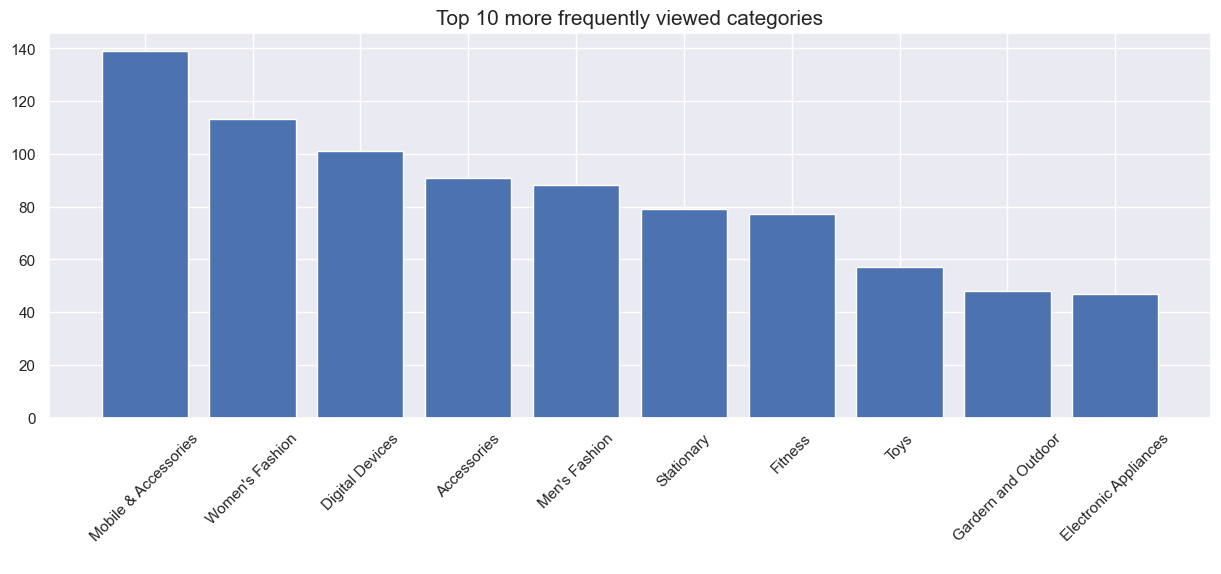

In [7]:
# Distribution of Category
print("Total Unique Categories: " + str(data.Category.nunique()))
temp_category = data.groupby('Category')['Session_id'].count().sort_values(ascending=False).reset_index()[:10]

plt.figure(figsize=(15,5))
plt.bar(temp_category.Category, temp_category.Session_id)
plt.title("Top 10 more frequently viewed categories", size=15)
plt.xticks(rotation=45)
plt.xlabel(" ")
plt.show()

#### Distribution of SubCategory:

([Contents:](#Contents:))

Total Unique SubCategories: 364


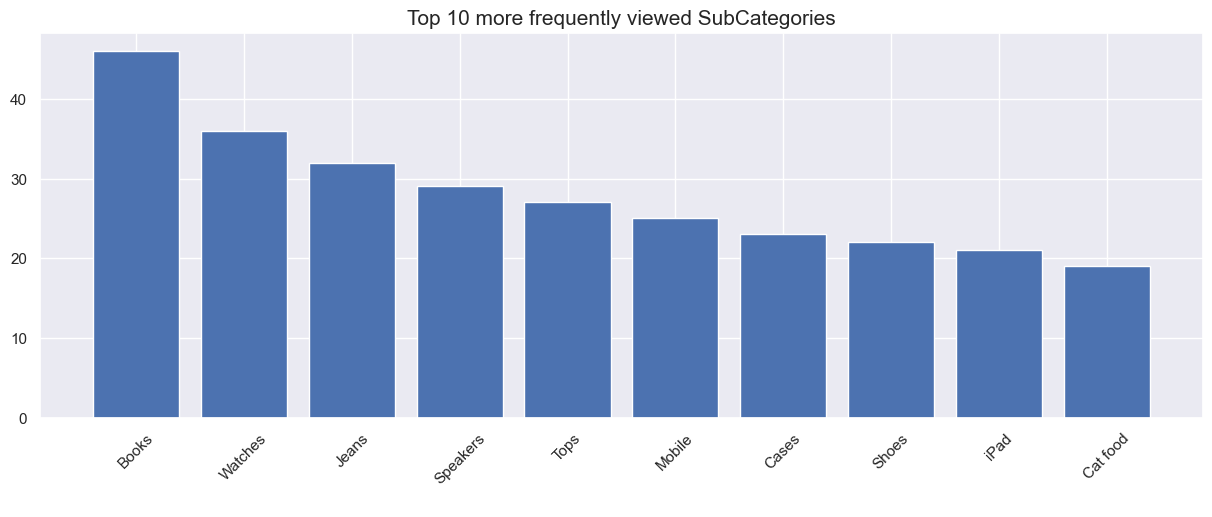

In [8]:
# Distribution of SubCategory
print("Total Unique SubCategories: " + str(data.SubCategory.nunique()))
temp_subcategory = data.groupby('SubCategory')['Session_id'].count().sort_values(ascending=False).reset_index()[:10]

plt.figure(figsize=(15,5))
plt.bar(temp_subcategory.SubCategory, temp_subcategory.Session_id)
plt.title("Top 10 more frequently viewed SubCategories", size=15)
plt.xticks(rotation=45)
plt.xlabel(" ")
plt.show()

#### Distribution of Action:

([Contents:](#Contents:))

read_reviews           342
search                 320
product_view           292
add_to_cart            280
checkout               202
click_wishlist_page    202
purchase               201
first_app_open         121
add_review              69
add_to_wishlist         33
product_review          22
add_to_wishist           5
read_review              1
Name: Action, dtype: int64

Total Unique Actions: 11


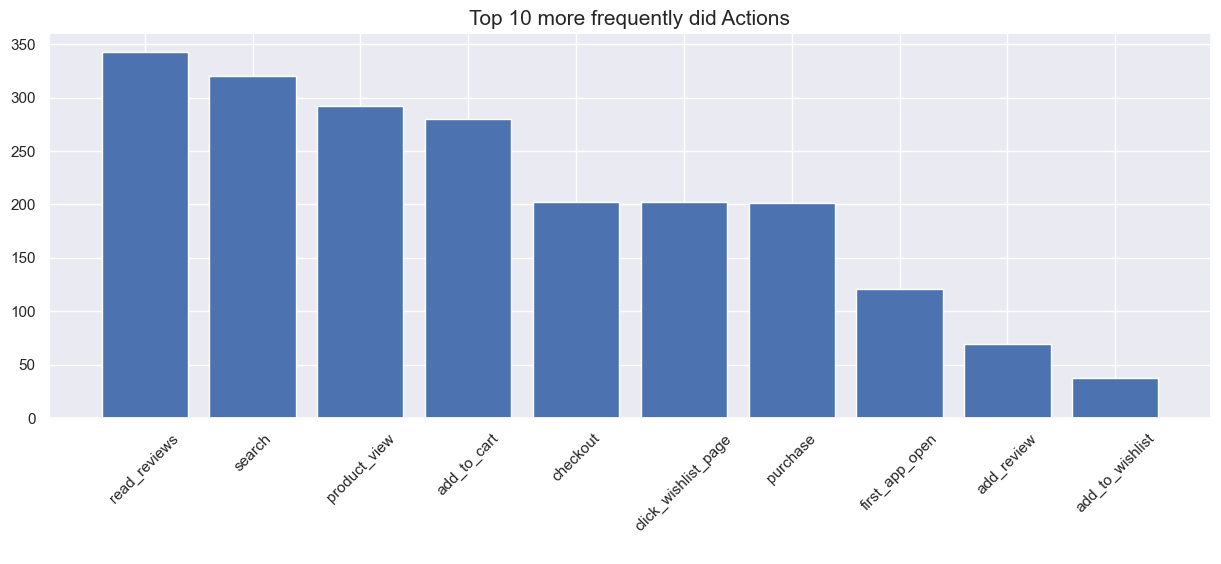

read_reviews           343
search                 320
product_view           292
add_to_cart            280
checkout               202
click_wishlist_page    202
purchase               201
first_app_open         121
add_review              69
add_to_wishlist         38
product_review          22
Name: Action, dtype: int64

In [9]:
# Distribution of Action
display(data.Action.value_counts())

data['Action'] = data['Action'].apply(lambda x: 'read_reviews' if x in ('read_review') else x)
data['Action'] = data['Action'].apply(lambda x: 'add_to_wishlist' if x in ('add_to_wishist') else x)

print("Total Unique Actions: " + str(data.Action.nunique()))
temp_actions = data.groupby('Action')['Session_id'].count().sort_values(ascending=False).reset_index()[:10]

plt.figure(figsize=(15,5))
plt.bar(temp_actions.Action, temp_actions.Session_id)
plt.title("Top 10 more frequently did Actions", size=15)
plt.xticks(rotation=45)
plt.xlabel(" ")
plt.show()

data.Action.value_counts()

In [10]:
data.head(3)

,User_id,Session_id,DateTime,Category,SubCategory,Action,Quantity,Rate,Total Price
0,52243841613,d76fde-8bb3-4e00-8c23,2019-01-10 10:20:00,Electronic Appliances,Speakers,first_app_open,NaN,NaN,NaN
1,52243841613,33dfbd-b87a-4708-9857,2019-01-10 10:22:00,Electronic Appliances,Speakers,search,NaN,NaN,NaN
2,57314161118,6511c2-e2e3-422b-b695,2019-01-10 14:00:00,Men's Fashion,Jeans,search,NaN,NaN,NaN


#### Distribution of Quantity:

([Contents:](#Contents:))

Summary stats of Quantity:


,Quantity
count,201.000000
mean,2.965174
std,7.161968
min,1.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,100.000000


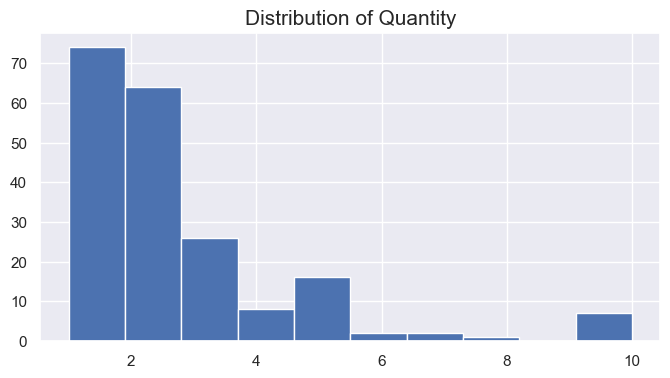

In [11]:
# Distribution of Quantity
print("Summary stats of Quantity:")
display(data[['Quantity']].describe())

plt.figure(figsize=(8,4))
plt.hist(data[data['Quantity']<100]['Quantity'], density=False)
plt.title("Distribution of Quantity",size=15)
plt.show()

It is evident from the summary stats that the "Quantity" column has an outlier (the value 100, occured only once in the dataset). 

#### Distribution of Rate:

([Contents:](#Contents:))

Summary stats of Rate:


,Rate
count,201.000000
mean,7133.283582
std,14778.150668
min,10.000000
25%,500.000000
50%,1200.000000
75%,6000.000000
max,90000.000000


Total records less than or equal to 75% cut: 154
Total records greater than 75% cut: 47


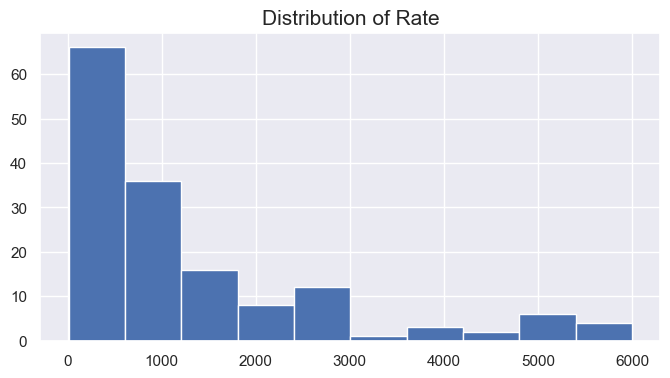

In [12]:
# Distribution of Rate
print("Summary stats of Rate:")
display(data[['Rate']].describe())

print("Total records less than or equal to 75% cut: " + str(data[data['Rate']<=6000].shape[0]))
print("Total records greater than 75% cut: " + str(data[data['Rate']>6000].shape[0]))

plt.figure(figsize=(8,4))
plt.hist(data[data['Rate']<=6000]['Rate'], density=False, bins=10)
plt.title("Distribution of Rate",size=15)
plt.show()

#### Distribution of Total Price:

([Contents:](#Contents:))

Summary stats of Total Price:


,Total Price
count,201.000000
mean,9455.373134
std,18213.695424
min,150.000000
25%,1000.000000
50%,2500.000000
75%,8000.000000
max,160000.000000


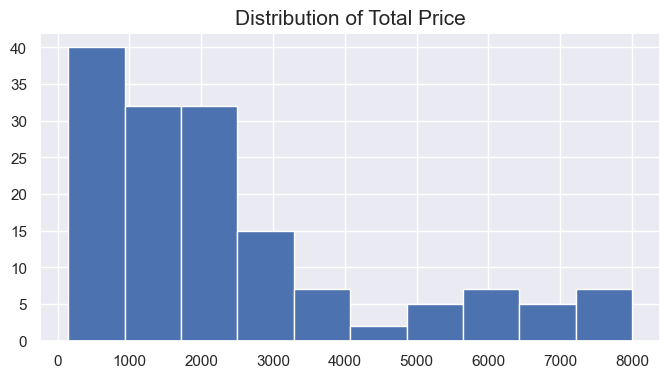

In [13]:
# Distribution of Total Price
print("Summary stats of Total Price:")
display(data[['Total Price']].describe())

plt.figure(figsize=(8,4))
plt.hist(data[data['Total Price']<=8000]['Total Price'], density=False)
plt.title("Distribution of Total Price",size=15)
plt.show()

## Multivariate Analysis:

([Contents:](#Contents:))

Multivariate analysis helps us to understand how two or more columns are related to each other and its relationship with the target variable.

Based on the initial understanding of the different columns in the data (univariate analysis), we can create some hypothesis (if any) or try to ask more complex questions such as:
* How many unique users in the data and how many of them purchased atleast once? Also, what is the average number of purchase per customer?
* Which is the most purchased Category/Sub-category?
* Do people add the products to cart before they purchase or buy directly?
* What is the average time taken by a user to buy a product? 
* What is the average time between repeat purchase?
* What is the trend of unique users across the time period?
* What is the trend of purchase across the time period?

This is not the exhaustive list but good to start with.

#### How many unique users in the data and how many of them purchased atleast once? Also, what is the average number of purchase per customer?

([Contents:](#Contents:))

In [14]:
# unique customers 
total_users = data.User_id.nunique()
print(f"Total customers: {total_users}")

# atleast 1 purchase customer
atleast_one_purchase_cust = data[data['Action']=='purchase']['User_id'].nunique()
conversion = 100*round(atleast_one_purchase_cust/total_users,2)
print(f"Customers who made atleast 1 purchase: {atleast_one_purchase_cust} ({conversion}% conversion)")

# avg purchase per customer
purch_dist_by_cust = (data[data['Action']=='purchase'].groupby('User_id').agg({'SubCategory': 'count'})
                      .reset_index().sort_values(by='SubCategory',ascending=False)
                     )
purch_dist_by_cust.rename(columns={'SubCategory':'no_of_purchase'},inplace=True)

print(f"Average number of purchase per customer: {round(purch_dist_by_cust.no_of_purchase.mean(),2)}")
print("\nDistribution of Number of Purchases:")
display(purch_dist_by_cust[['no_of_purchase']].describe())


Total customers: 401
Customers who made atleast 1 purchase: 167 (42.0% conversion)
Average number of purchase per customer: 1.2

Distribution of Number of Purchases:


,no_of_purchase
count,167.000000
mean,1.203593
std,0.432685
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,3.000000


#### Which is the most purchased Category/Sub-category?

([Contents:](#Contents:))

Total Unique Categories: 105


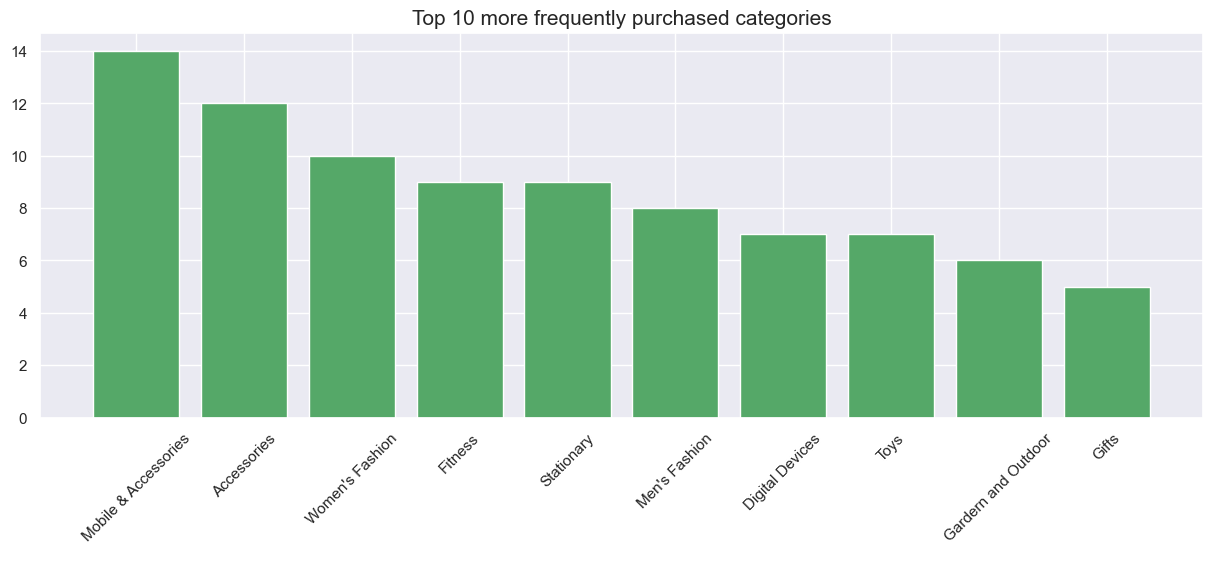

Total Unique SubCategory: 364


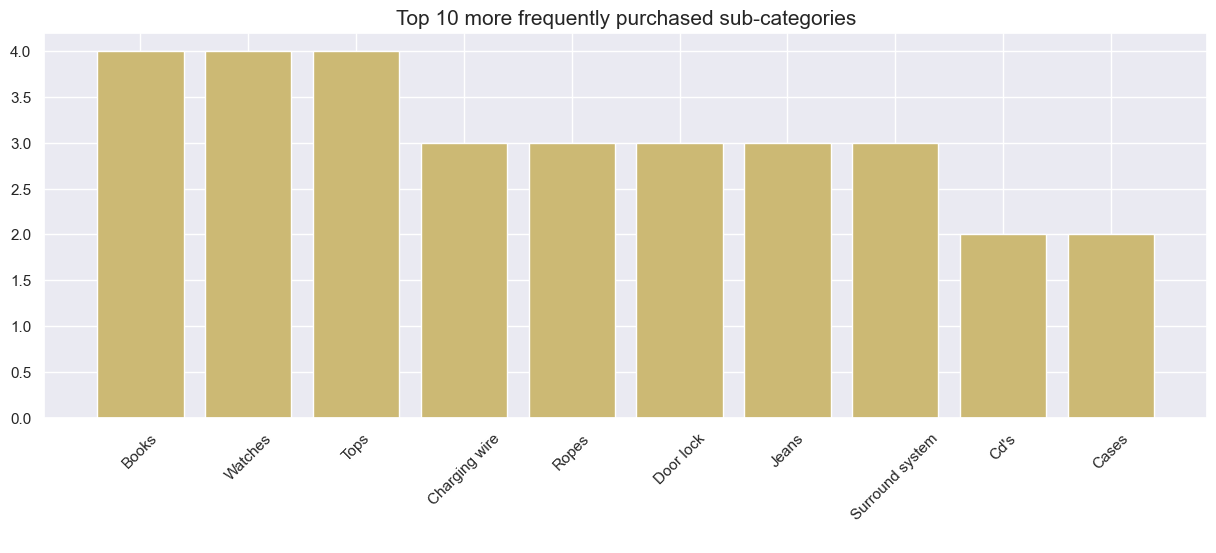

In [15]:
# Top 10 purchased Category
print("Total Unique Categories: " + str(data.Category.nunique()))
temp_category = data[data['Action']=='purchase'].groupby('Category')['User_id'].count().sort_values(ascending=False).reset_index()[:10]

plt.figure(figsize=(15,5))
plt.bar(temp_category.Category, temp_category.User_id, color='g')
plt.title("Top 10 more frequently purchased categories", size=15)
plt.xticks(rotation=45)
plt.xlabel(" ")
plt.show()

# Top 10 purchased SubCategory
print("Total Unique SubCategory: " + str(data.SubCategory.nunique()))
temp_subcategory = data[data['Action']=='purchase'].groupby('SubCategory')['User_id'].count().sort_values(ascending=False).reset_index()[:10]

plt.figure(figsize=(15,5))
plt.bar(temp_subcategory.SubCategory, temp_subcategory.User_id, color='y')
plt.title("Top 10 more frequently purchased sub-categories", size=15)
plt.xticks(rotation=45)
plt.xlabel(" ")
plt.show()

#### Do people add the products to cart before they purchase or buy directly?

([Contents:](#Contents:))

In [16]:
# Distribution of users who purchased after adding to cart and direct purchase
purchase_users = data[data['Action']=='purchase'].groupby('User_id')['Action'].count().reset_index()

cart_users = data[data['Action']=='add_to_cart'].groupby('User_id')['Action'].count().reset_index()

temp = pd.merge(purchase_users,cart_users,on='User_id',how='left',indicator=True)
direct_buy = temp[temp['_merge']=='left_only'].shape[0]

temp = pd.merge(cart_users,purchase_users,on='User_id',how='left',indicator=True)
cart_only = temp[temp['_merge']=='left_only'].shape[0]

print("Total unique users who purchased: " + str(purchase_users.shape[0]))
print("Total direct buy (without adding to cart): " + str(direct_buy))
print("Total add_to_cart buy: " + str(cart_users.shape[0]-cart_only))

print("\nTotal unique users who added to cart: " + str(cart_users.shape[0]))
print("Total cart only users (no purchase): " + str(cart_only))

Total unique users who purchased: 167
Total direct buy (without adding to cart): 20
Total add_to_cart buy: 147

Total unique users who added to cart: 240
Total cart only users (no purchase): 93


#### What is the average time taken by a user to buy a product?

([Contents:](#Contents:))

In [17]:
print(purch_dist_by_cust.shape)
purch_dist_by_cust.head()

(167, 2)


,User_id,no_of_purchase
165,60238282834,3
17,51565158157,3
0,51448162784,2
108,53966220604,2
34,51725305614,2



Summary stats (Time diff in days):


,avg_time_diff_days
count,2090.000000
mean,58.562679
std,94.365687
min,0.000000
25%,0.000000
50%,0.000000
75%,105.000000
max,335.000000


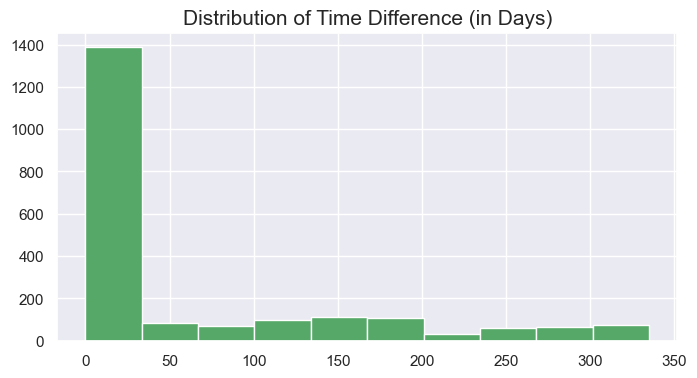


Summary stats (Time diff in minutes):


,avg_time_diff_minutes
count,2090.000000
mean,231.705742
std,394.751734
min,0.000000
25%,14.000000
50%,30.000000
75%,242.000000
max,1404.000000


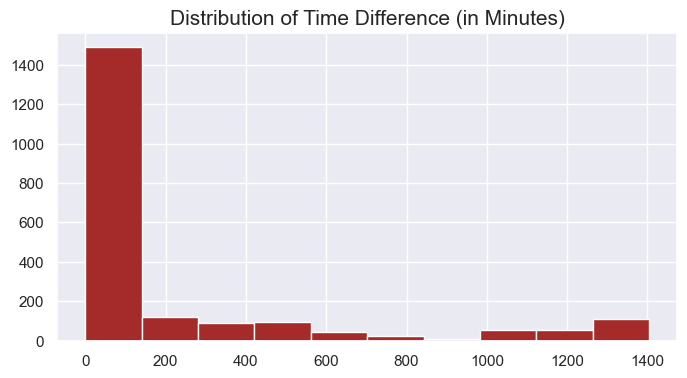

In [18]:
# Avg time difference between purchase
# Also after purchase users are either adding review or not. But since add_review event is low (69), ignoring it now
temp = data.copy()
temp = pd.merge(temp, purch_dist_by_cust, on='User_id', how='left')
temp['no_of_purchase'] = temp['no_of_purchase'].fillna(0)
# temp = temp[temp['no_of_purchase'] == 1].reset_index(drop=True)
# print("Total users who made exactly 1 purchase: " +str(temp.User_id.nunique()))

temp['min_time'] = temp.groupby('User_id')['DateTime'].transform(min)
temp['max_purchase_time'] = temp.groupby('User_id')['DateTime'].transform(max)
temp['avg_time_diff_days'] = (temp['max_purchase_time']-temp['min_time']).dt.days
temp['avg_time_diff_minutes'] = (temp['max_purchase_time']-temp['min_time']).dt.seconds/60

print("\nSummary stats (Time diff in days):")
display(temp[['avg_time_diff_days']].describe())

plt.figure(figsize=(8,4))
plt.hist(temp['avg_time_diff_days'], density=False, color='g')
plt.title("Distribution of Time Difference (in Days)",size=15)
plt.show()

print("\nSummary stats (Time diff in minutes):")
display(temp[['avg_time_diff_minutes']].describe())

plt.figure(figsize=(8,4))
plt.hist(temp['avg_time_diff_minutes'], density=False, color='brown')
plt.title("Distribution of Time Difference (in Minutes)",size=15)
plt.show()

#### What is the average time between repeat purchase?

([Contents:](#Contents:))

Total users who made more than 1 purchase: 32

Summary stats (Time diff in days):


,diff
count,32.00000
mean,101.03125
std,76.81628
min,0.00000
25%,35.25000
50%,90.50000
75%,177.25000
max,245.00000


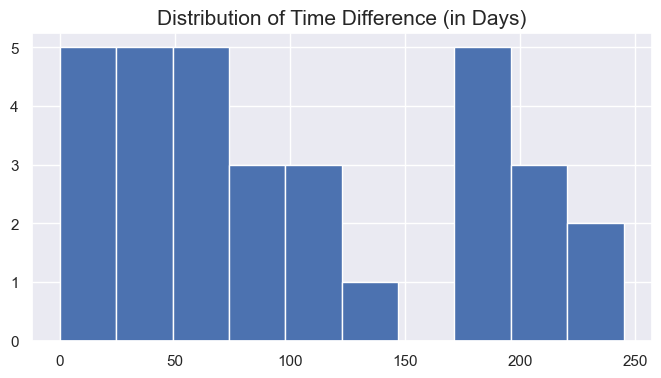

In [19]:
# Average time between repeat purchase
temp = data.copy()
temp = pd.merge(temp, purch_dist_by_cust, on='User_id', how='left')
temp['no_of_purchase'] = temp['no_of_purchase'].fillna(0)
temp = temp[temp['no_of_purchase'] > 1].reset_index(drop=True)
print("Total users who made more than 1 purchase: " +str(temp.User_id.nunique()))

def purch_time_diff(x):
    if len(x) == 2:
        return (x[1]-x[0]).days

    if len(x) == 3:
        diff_12 = (x[1]-x[0]).days
        diff_23 = (x[2]-x[1]).days
        return (diff_12+diff_23)/2

test = temp[temp['Action']=='purchase'].sort_values(by=['User_id','DateTime'])
test = test.groupby('User_id').agg({'DateTime': lambda x: list(x)})
test['diff'] = test['DateTime'].apply(purch_time_diff)
test = test.reset_index()

print("\nSummary stats (Time diff in days):")
display(test[['diff']].describe())

plt.figure(figsize=(8,4))
plt.hist(test['diff'], density=False, color='b')
plt.title("Distribution of Time Difference (in Days)",size=15)
plt.show()

In [20]:
test.sample(5)

,User_id,DateTime,diff
15,51940324591,"[2019-04-08 19:09:00, 2019-12-10 13:07:00]",245.0
12,51629142904,"[2019-01-10 21:08:00, 2019-09-03 18:10:00]",235.0
31,60302643179,"[2019-07-18 21:06:00, 2019-11-11 19:37:00]",115.0
18,52769802843,"[2019-09-12 20:47:00, 2019-09-12 22:59:00]",0.0
17,51969791374,"[2019-08-19 18:36:00, 2019-10-26 14:40:00]",67.0


#### What is the trend of unique users across time period?

([Contents:](#Contents:))

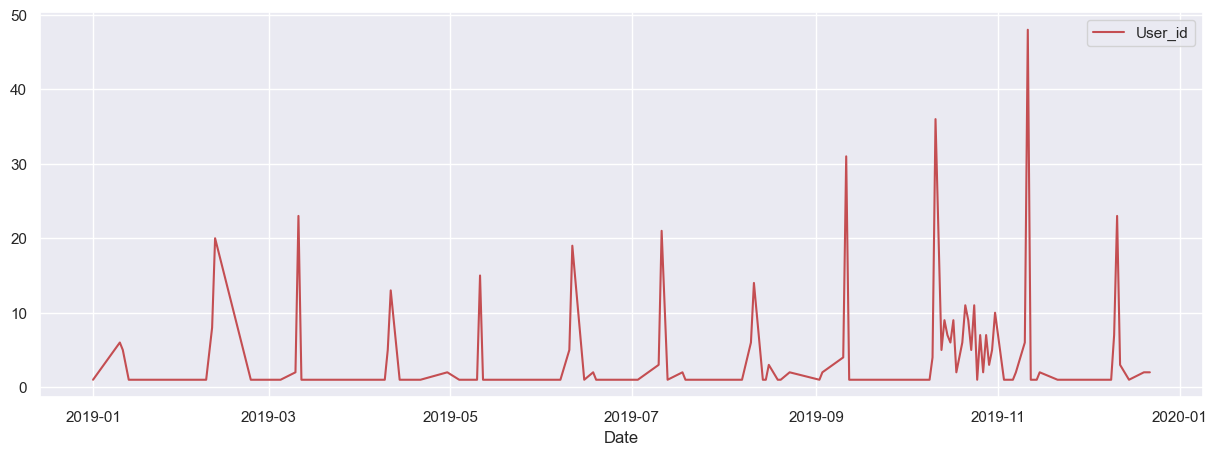

In [21]:
# Distribution of unique users across dates
temp = data.copy()
temp['Date'] = temp['DateTime'].dt.date
temp = temp.groupby('Date').agg({'User_id': 'nunique'}).reset_index().sort_values(by='Date')
# display(temp.head())

temp.set_index('Date').plot(figsize=(15,5), color='r')
plt.show()

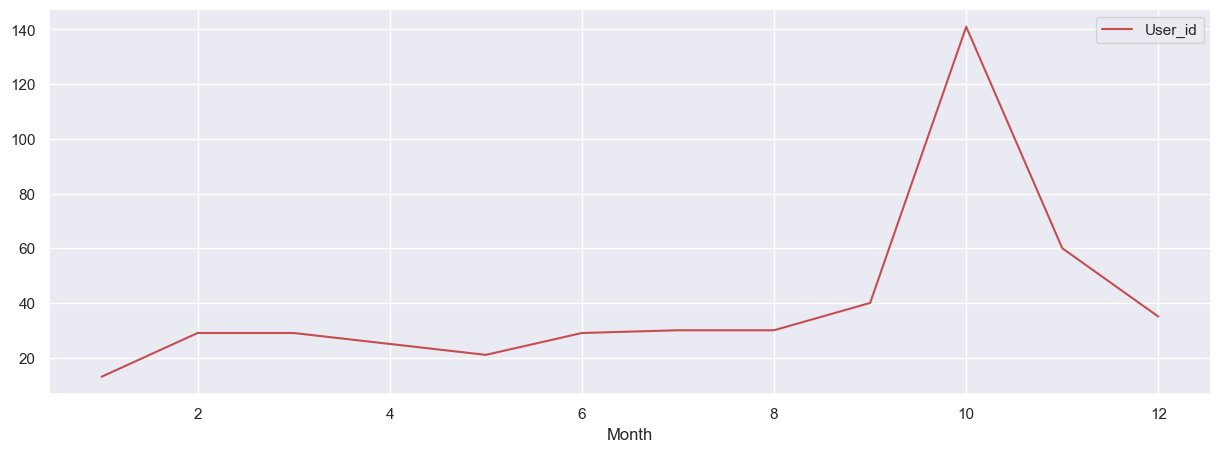

In [22]:
# Distribution of unique users across Month
temp = data.copy()
temp['Date'] = temp['DateTime'].dt.date
temp['Month'] = temp['DateTime'].dt.month
temp = temp.groupby('Month').agg({'User_id': 'nunique'}).reset_index().sort_values(by='Month')
# display(temp.head())

temp.set_index('Month').plot(figsize=(15,5),color='r')
plt.show()

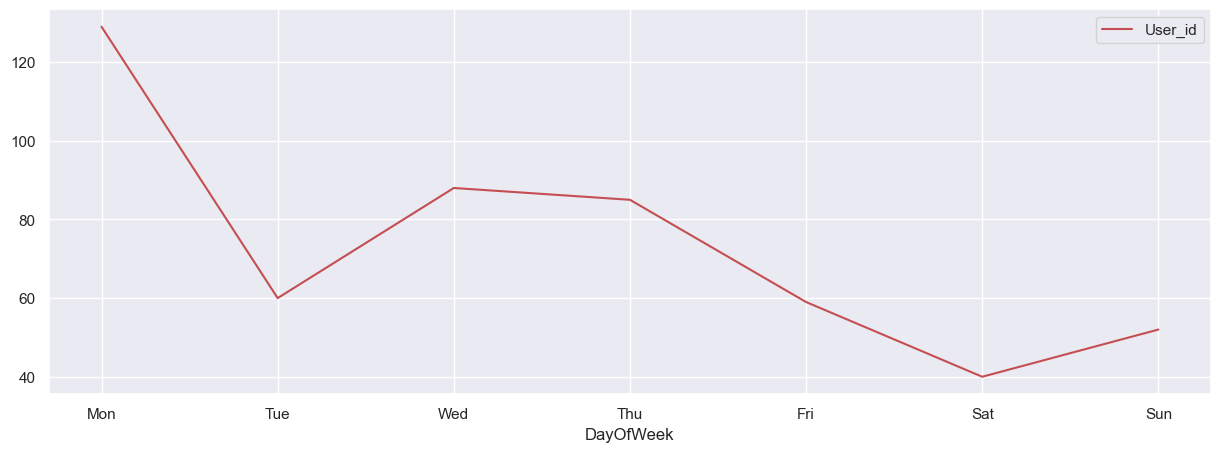

In [23]:
# Distribution of unique users across weekdays
temp = data.copy()
temp['Date'] = temp['DateTime'].dt.date
temp['Month'] = temp['DateTime'].dt.month
temp['DayOfWeek'] = temp['DateTime'].dt.dayofweek
temp = temp.groupby('DayOfWeek').agg({'User_id': 'nunique'}).reset_index().sort_values(by='DayOfWeek')
# display(temp.head())

temp.set_index('DayOfWeek').plot(figsize=(15,5),color='r')
plt.xticks([0,1,2,3,4,5,6],['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
plt.show()

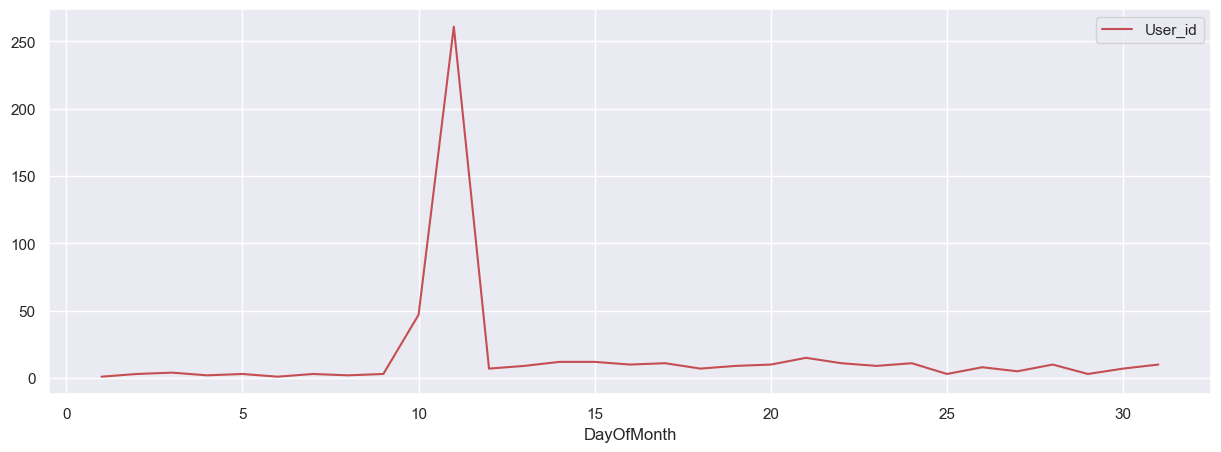

In [24]:
# Distribution of unique users across day of month
temp = data.copy()
temp['Date'] = temp['DateTime'].dt.date
temp['Month'] = temp['DateTime'].dt.month
temp['DayOfWeek'] = temp['DateTime'].dt.dayofweek
temp['DayOfMonth'] = temp['DateTime'].dt.day
temp = temp.groupby('DayOfMonth').agg({'User_id': 'nunique'}).reset_index().sort_values(by='DayOfMonth')
# display(temp.head())

temp.set_index('DayOfMonth').plot(figsize=(15,5),color='r')
plt.show()

#### What is the trend of purchase across the time period?

([Contents:](#Contents:))

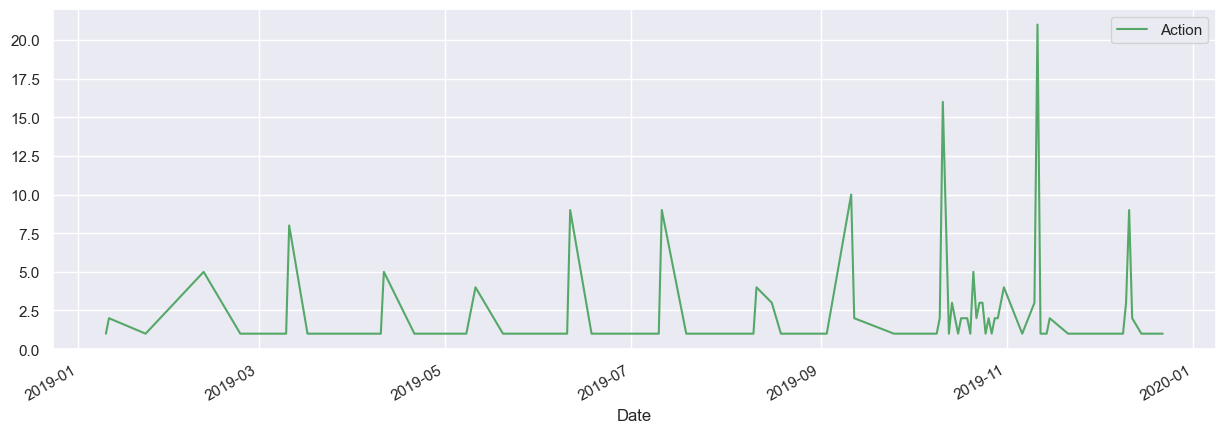

In [25]:
# Distribution of purchases across dates
temp = data.copy()
temp['Date'] = temp['DateTime'].dt.date
temp['Date'] = pd.to_datetime(temp['Date'])
temp['Month'] = temp['DateTime'].dt.month
temp['DayOfWeek'] = temp['DateTime'].dt.dayofweek
temp = temp[temp['Action']=='purchase'].groupby('Date').agg({'Action': 'count'}).reset_index().sort_values(by='Date')
# display(temp.head())
# print(temp.Action.sum())

temp.set_index('Date').plot(figsize=(15,5), color='g')
plt.show()

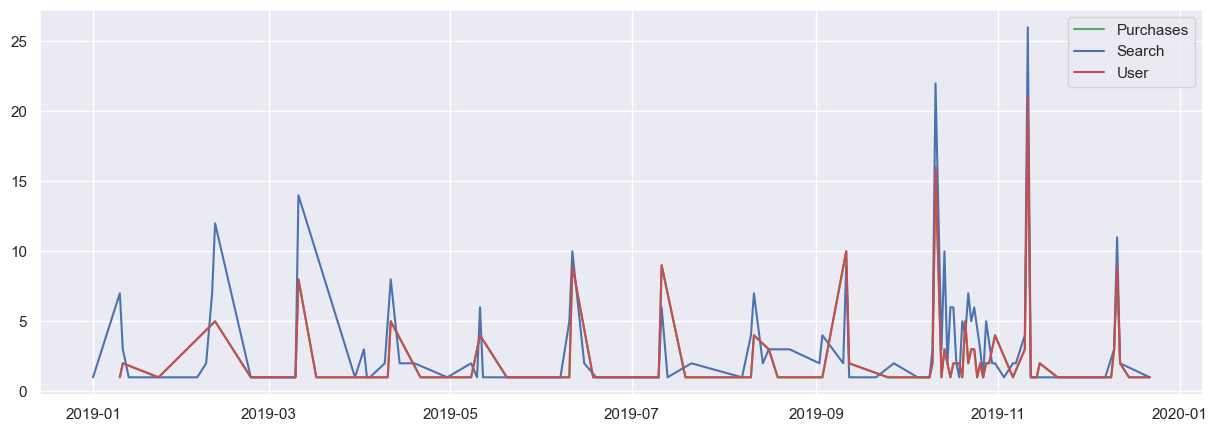

In [85]:
# Distribution of purchases across dates
temp = data.copy()
temp['Date'] = temp['DateTime'].dt.date
temp['Date'] = pd.to_datetime(temp['Date'])
temp['Month'] = temp['DateTime'].dt.month
temp['DayOfWeek'] = temp['DateTime'].dt.dayofweek
temp1 = temp[temp['Action']=='purchase'].groupby('Date').agg({'Action': 'count'}).reset_index().sort_values(by='Date')
temp2 = temp[temp['Action']=='search'].groupby('Date').agg({'Action': 'count'}).reset_index().sort_values(by='Date')

temp3 = temp[temp['Action']=='purchase'].groupby('Date').agg({'Session_id': 'count'}).reset_index().sort_values(by='Date')
# display(temp.head())
# print(temp.Action.sum())



# Plotting both datasets on the same graph
plt.figure(figsize=(15, 5))
plt.plot(temp1['Date'], temp1['Action'], color='g', label='Purchases')
plt.plot(temp2['Date'], temp2['Action'], color='b', label='Search')
plt.plot(temp3['Date'], temp3['Session_id'], color='r', label='User')
plt.legend()

plt.show()

In [30]:
data.head()

,User_id,Session_id,DateTime,Category,SubCategory,Action,Quantity,Rate,Total Price
0,52243841613,d76fde-8bb3-4e00-8c23,2019-01-10 10:20:00,Electronic Appliances,Speakers,first_app_open,NaN,NaN,NaN
1,52243841613,33dfbd-b87a-4708-9857,2019-01-10 10:22:00,Electronic Appliances,Speakers,search,NaN,NaN,NaN
2,57314161118,6511c2-e2e3-422b-b695,2019-01-10 14:00:00,Men's Fashion,Jeans,search,NaN,NaN,NaN
3,57314161118,90fc70-0e80-4590-96f3,2019-01-10 14:07:00,Men's Fashion,Jeans,product_view,NaN,NaN,NaN
4,57314161118,bd7419-2748-4c56-95b4,2019-01-10 14:12:00,Men's Fashion,Jeans,read_reviews,NaN,NaN,NaN


In [40]:
data['Action'].unique()

array(['first_app_open', 'search', 'product_view', 'read_reviews',
       'add_review', 'add_to_cart', 'checkout', 'purchase',
       'add_to_wishlist', 'click_wishlist_page', 'product_review'],
      dtype=object)

In [41]:
data['Category'].unique()

array(['Electronic Appliances', "Men's Fashion", 'Mobile & Accessories',
       'Cleaning supplies', 'Digital Devices', 'Accessories',
       'Stationary', 'Digital Content', 'Fitness', "Women's Fashion",
       'Household Supplies', 'Smart Wearables', 'Appliances', 'Pet Care',
       'Gardern and Outdoor', 'Camera Accessories', 'eCommerce',
       'Baby Care', 'Gaming Accessories', 'Musical Instruments',
       'Kitchen Appliances', 'Home Appliances', 'Entertainment Systems',
       'Software', 'Pendrives', 'Home Decor', 'Digital Appliances',
       'Electrical tools', 'Large appliances', 'Furnitures',
       'Religious items', 'Artwork', 'Baby Products', 'Car Accessories',
       "Kid's fashion", 'Motorbike Accessories', 'Toys', 'Music',
       'Music\n', 'Gifts', 'Tv and Appliances', 'Bags and Luggage',
       'Large Appliances', 'Industrial', 'Gardening', 'Grocery',
       'Winter Wear', 'Personal Care', "Men's Bottom Wear",
       "Men's Top Wear", 'Shoe care', 'Computer Periphera

In [45]:
temp[temp['Category']=='Books'].count()

User_id        15
Session_id     15
DateTime       15
Category       15
SubCategory    15
Action         15
Quantity        2
Rate            2
Total Price     2
Date           15
Month          15
DayOfWeek      15
dtype: int64